# Data Analysis On Netflix Dataset 

#### Importing Required Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime as dt
%matplotlib inline


## Data Processing and Cleaning

In [47]:
csv_file = "data/netflix_titles.csv"
netflix_data_df = pd.read_csv(csv_file)
netflix_data_df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [48]:
#renaming two columns (type and listed_in) 
netflix_data_df.rename(columns = {'type':'entertainment type', 'listed_in':'genre'}, inplace = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [49]:
##searching for all null values within this dataset
#we are going to add values in null for country, rating, and date added

netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                476
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [50]:
#counting the number of countries
country_count= netflix_data_df['country'].value_counts()
country_count


United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 554, dtype: int64

In [51]:
#replaced the null values with "united states"
netflix_data_df['country'].replace(np.nan, 'United States',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [52]:
#checking to reconfirm no null values in country column
netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                  0
date_added              11
release_year             0
rating                  10
duration                 0
genre                    0
description              0
dtype: int64

In [53]:
#counting the highest rating based on the number of movies which is TV-MA and we will use this rating to fill any null values
#in rating column
rating_count= netflix_data_df['rating'].value_counts()
rating_count

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [62]:
# # df = pd.read_csv())

# # csv_file = "data/netflix_titles.csv"
# # netflix_data_df = pd.read_csv(csv_file)

# # title_list = df.title.T.values.tolist()
# # array_for_title = np.array(title_list)
# # print(array_for_title.reshape(6234,1))

# # print(" ")
# # year_list = df.release_year.T.values.tolist()
# # array_for_year = np.array(year_list)
# # print(array_for_year.reshape(6234,1))
# from api_keys import omdb_api_key
# import requests
# endpoint = "http://www.omdbapi.com/?apikey=omdb_api_key"
# # endpoint = "http://www.omdbapi.com/?apikey=omdb_api_key&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019"
# res = requests.get(endpoint)
# print(res.json())

# k = 0
# for i in range( len(array_for_title)):
#   show = array_for_title[i]
#   year = array_for_year[i]
#   key = "7055d37f"
#   endpoint = "http://www.omdbapi.com/?apikey={}&t={}&y={}".format(key, show, year)
#   res = requests.get(endpoint)
#   # get the imdb rating from retrieved json object
#   try:
#     df["imdbRating"][i] = res.json()["imdbRating"]
#     #rows.append({"imdbRating": res.json()["imdbRating"]})
#   except:
#     df["imdbRating"][i] = "NaN"
#     #rows.append({"imdbRating": "NaN"})
#   k+=1
#   if k == 900:
#     break
    
#     print(df)
# compression_opts = dict(method='zip',
#                         archive_name='out_final.csv')  
# df.to_csv('out_finalllll.zip', index=False,
#           compression=compression_opts)  
# !cp out_finalllll.zip "drive/My Drive/"

In [63]:
#filling null values in rating with TV-MA
netflix_data_df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020


In [64]:
#replaced the null values in date_added column with "1/1/2020"
netflix_data_df["date_added"] = netflix_data_df["date_added"].fillna("1/1/2020")
netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020


In [65]:
#reconfirming the date_added has no null values
netflix_data_df.isnull().sum()

show_id                  0
entertainment type       0
title                    0
director              1969
cast                   570
country                  0
date_added               0
release_year             0
rating                   0
duration                 0
genre                    0
description              0
year_added               0
dtype: int64

In [58]:
#creating a new column for date_added and keeping the format to years only
netflix_data_df["date_added"] = netflix_data_df["date_added"].str.strip()
netflix_data_df['year_added']=pd.DatetimeIndex(netflix_data_df['date_added']).year


netflix_data_df

,show_id,entertainment type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,1/1/2020,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,1/1/2020,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,United States,1/1/2020,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,1/1/2020,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020


In [13]:
netflix_data_df = netflix_data_df.drop(netflix_data_df.columns[[3, 4, 6, 11]], axis=1)
netflix_data_df

#removed director, cast, date_added, and description (uneccessary and too many null values)

,show_id,entertainment type,title,country,release_year,rating,duration,genre,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2019
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,2016
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,2018
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,2018
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,2017
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...",2020
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,2020
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,2020
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas",2020


In [14]:
netflix_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   show_id             6234 non-null   int64 
 1   entertainment type  6234 non-null   object
 2   title               6234 non-null   object
 3   country             6234 non-null   object
 4   release_year        6234 non-null   int64 
 5   rating              6234 non-null   object
 6   duration            6234 non-null   object
 7   genre               6234 non-null   object
 8   year_added          6234 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 438.5+ KB


## Analyzing Movies and TV Shows added on Netflix Over the Years

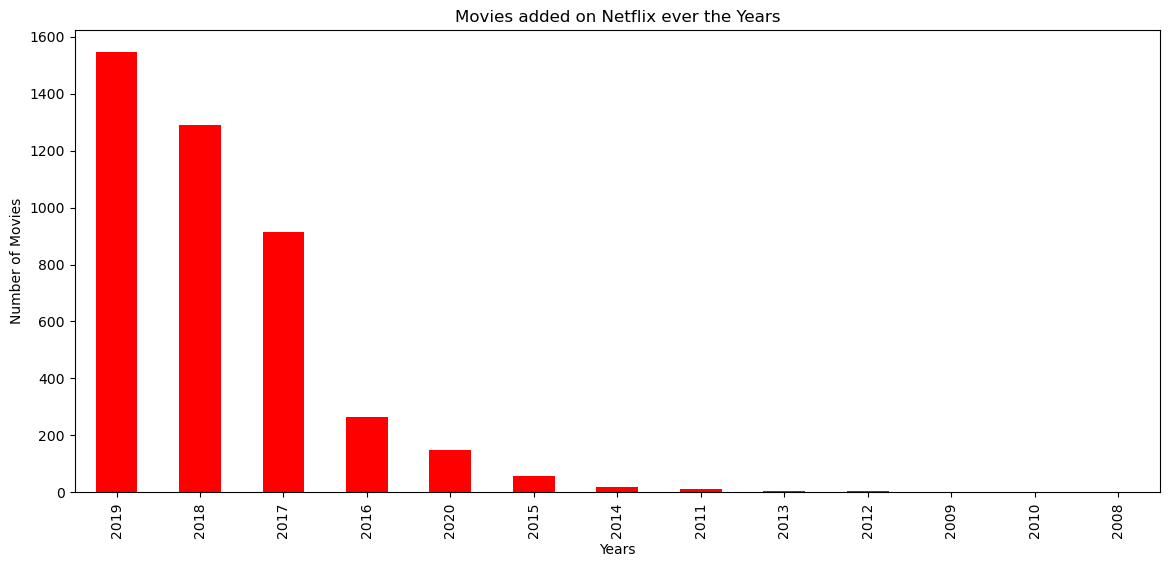

In [67]:

plt.figure(figsize=(14,6))
netflix_data_df[netflix_data_df["entertainment type"]=="Movie"]["year_added"].value_counts().plot(kind="bar",color="Red")
plt.title("Movies added on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of Movies")

plt.show()

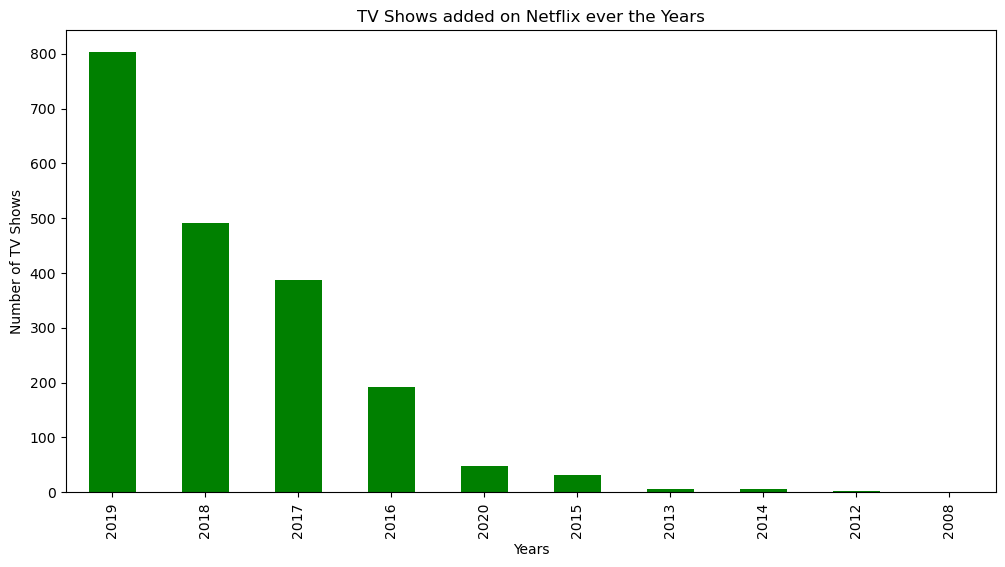

In [68]:
plt.figure(figsize=(12,6))
netflix_data_df[netflix_data_df["entertainment type"]=="TV Show"]["year_added"].value_counts().plot(kind="bar",color="Green")
plt.title("TV Shows added on Netflix ever the Years")
plt.xlabel("Years")
plt.ylabel("Number of TV Shows")
plt.show()

In [17]:
netflix_data_df.isnull().sum()

show_id               0
entertainment type    0
title                 0
country               0
release_year          0
rating                0
duration              0
genre                 0
year_added            0
dtype: int64

## Analyzing Entertainment Types - Movies / TV Shows

In [18]:
netflix_type_count= netflix_data_df.groupby(["entertainment type"])["entertainment type"].count()
netflix_type_count


entertainment type
Movie      4265
TV Show    1969
Name: entertainment type, dtype: int64

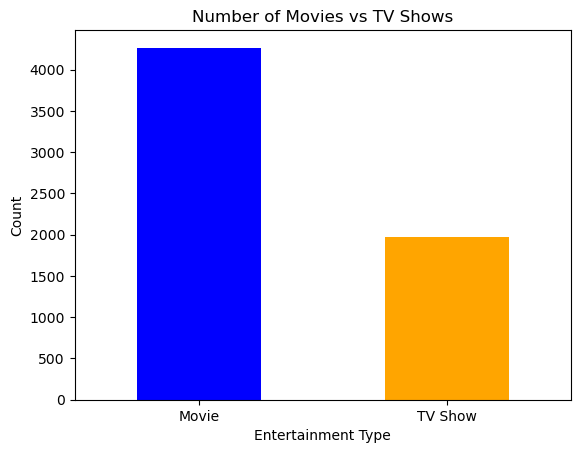

In [70]:
netflix_type_count.plot(x = "entertainment type", y = "entertainment type", kind = "bar", color=["blue", "orange"]) 
plt.title("Number of Movies vs TV Shows")
plt.xlabel("Entertainment Type")
plt.xticks(rotation="horizontal")
plt.ylabel("Count")
plt.show()



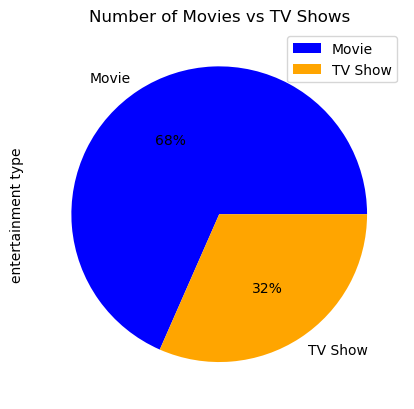

In [71]:
#2nd visual for entertainment type
netflix_type_count.plot.pie(autopct='%1.0f%%' , colors = ['blue', 'orange'],)

plt.title("Number of Movies vs TV Shows")
plt.legend()
plt.show()

### Observations on Data Types: 

### hh

## Analyzing Entertainment Type Based on Rating

<AxesSubplot:xlabel='rating', ylabel='count'>

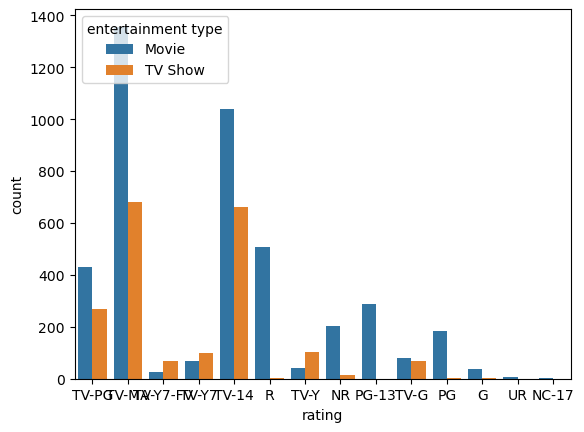

In [21]:
sns.countplot(x='rating',data = netflix_data_df, hue="entertainment type")
# sns.countplot(x='country',data = netflix_data_df,hue='entertainment type')

## Analyzing Data Based on Year Released vs Year Added on Netflix

<AxesSubplot:xlabel='release_year', ylabel='year_added'>

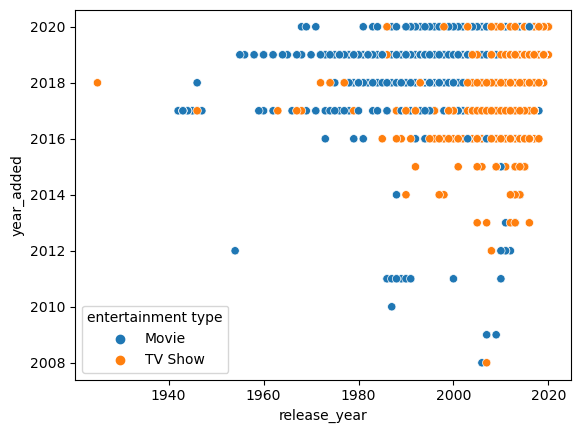

In [22]:

sns.scatterplot(data=netflix_data_df, x="release_year", y="year_added", hue=('entertainment type'))

In [23]:
release_year_df= netflix_data_df.groupby(["release_year"])["release_year"].count()
release_year_df

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: release_year, Length: 72, dtype: int64

In [24]:
netflix_genre_count= netflix_data_df.groupby(["genre"])["genre"].count()
netflix_genre_count

genre
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         1
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                        10
Thrillers                                                       40
Name: genre, Length: 461, dtype: int64

## Analyze the Top 10 Genres on Netflix

In [25]:
netflix_genre=netflix_data_df['genre'].value_counts().nlargest(10)
netflix_genre

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of Movies')

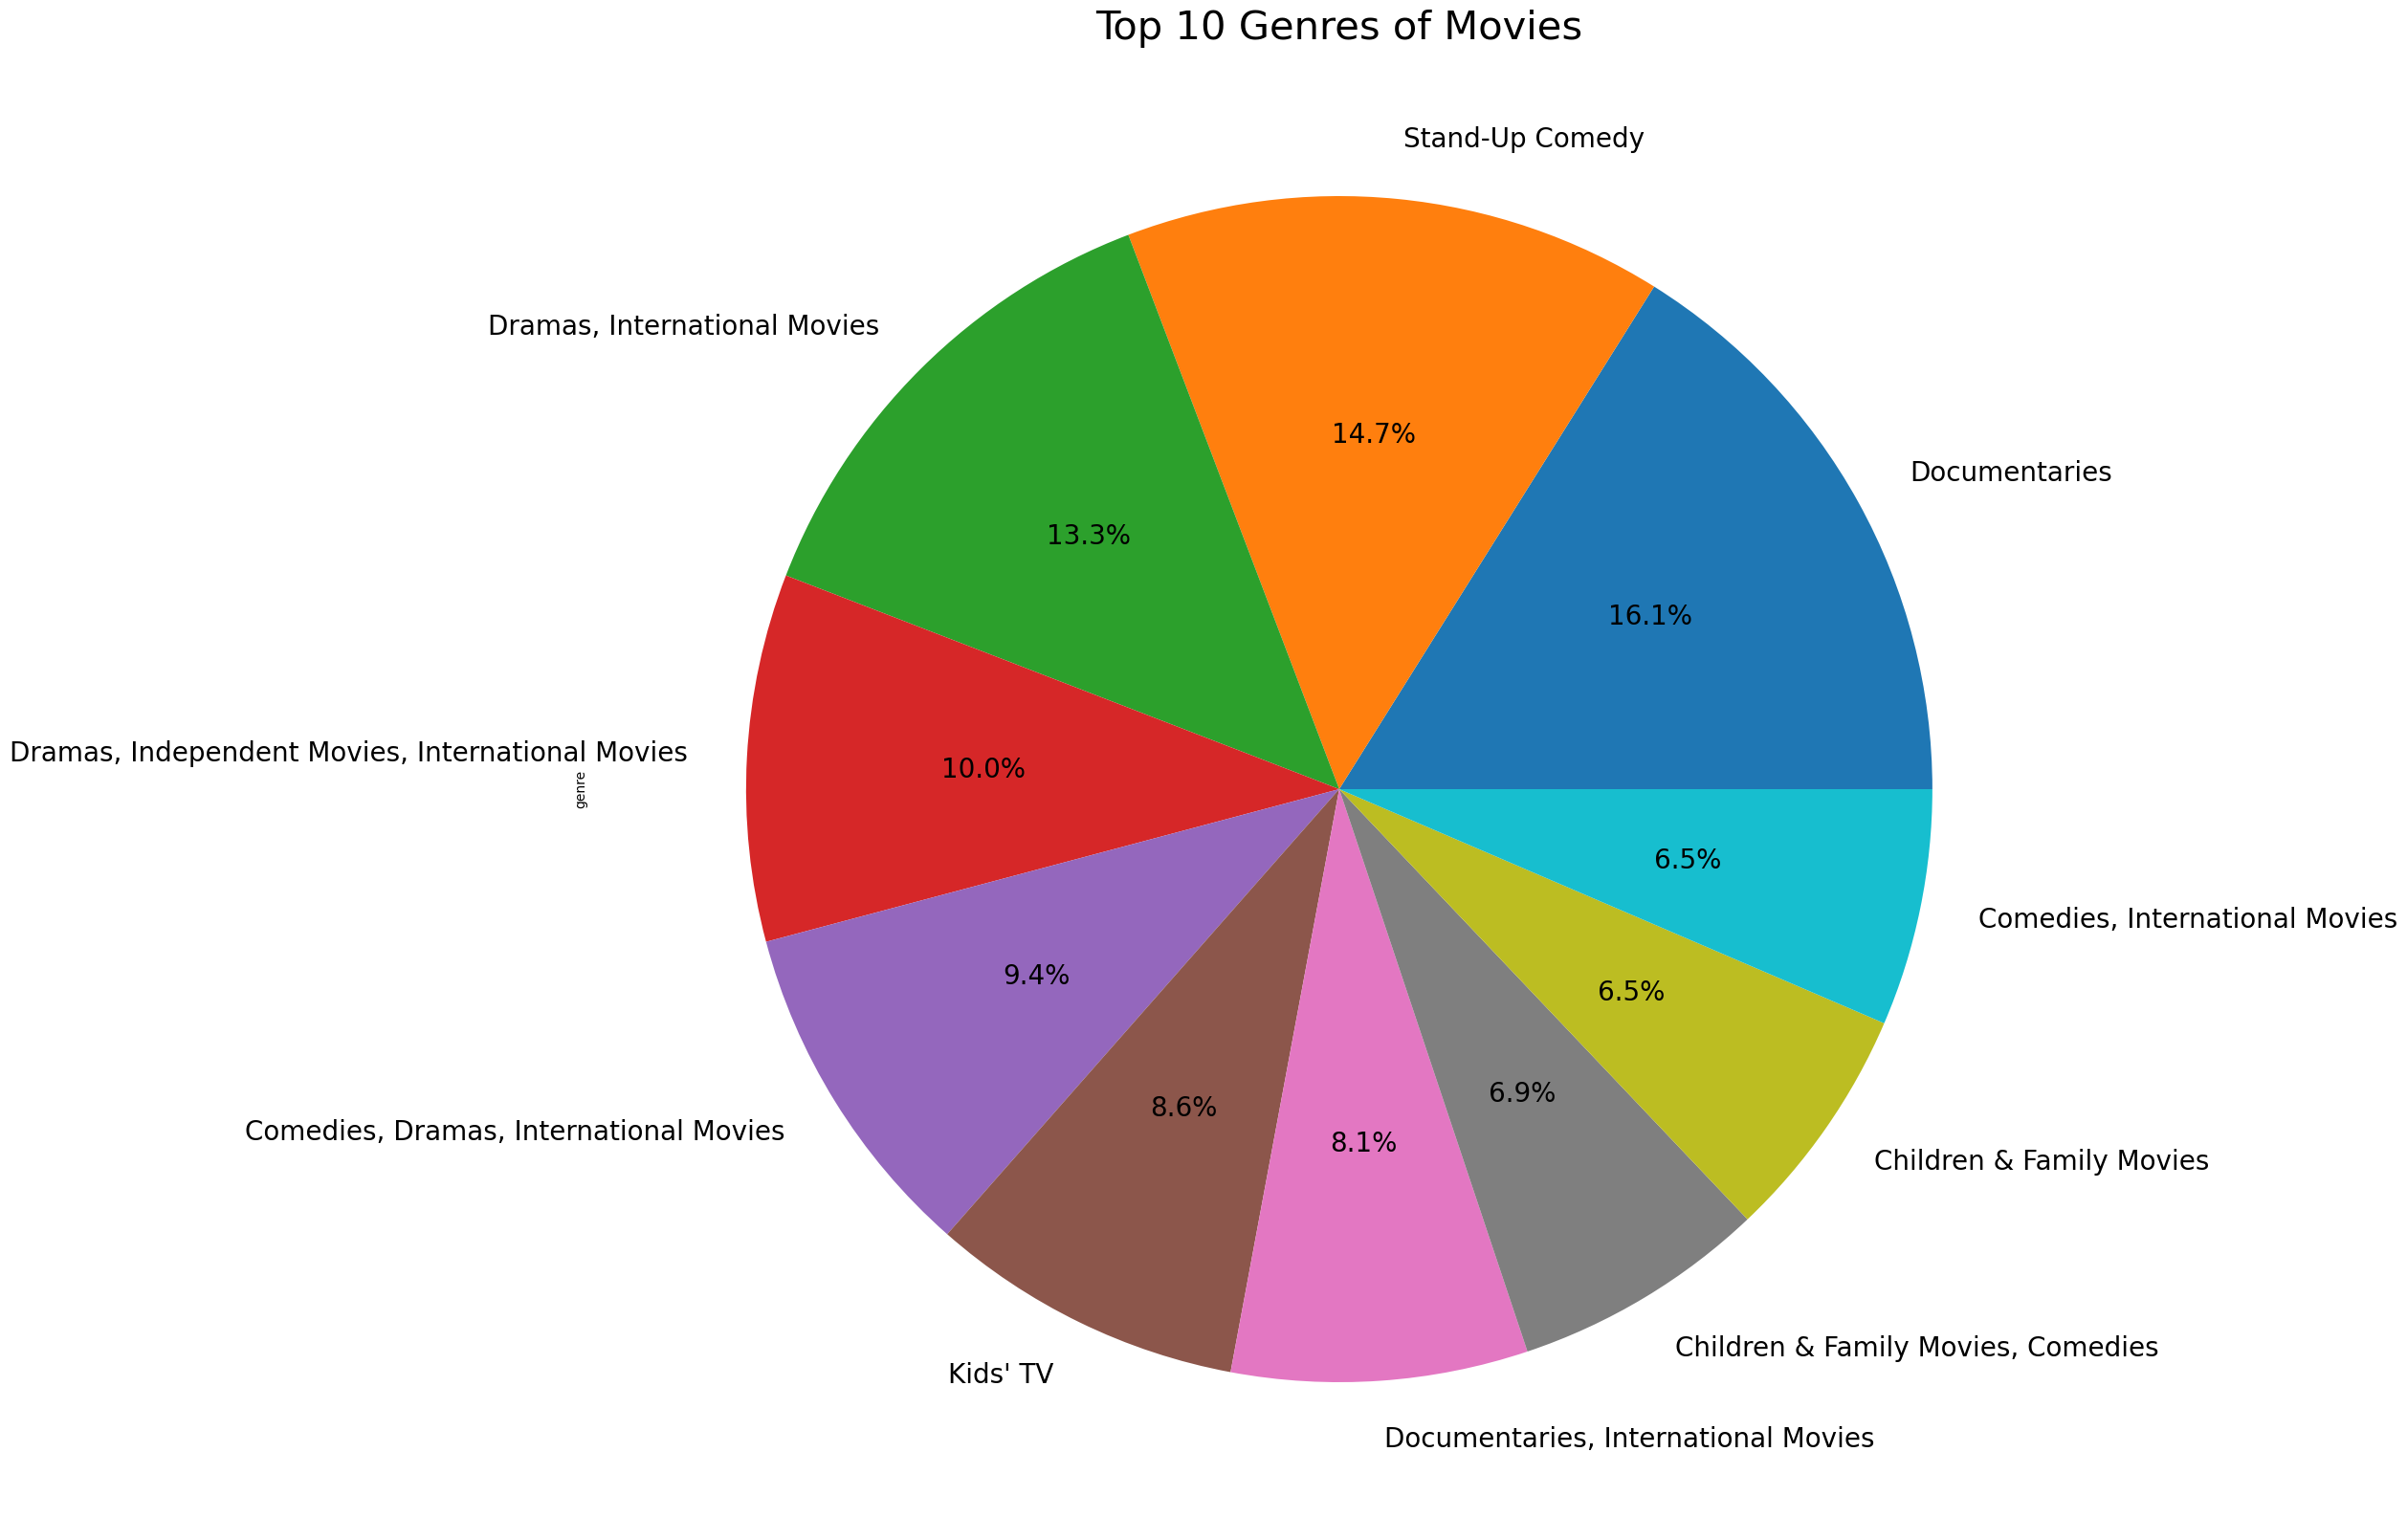

In [26]:
netflix_genre.plot.pie(autopct='%1.1f%%', figsize=(20, 35), textprops={'fontsize': 20})
plt.title("Top 10 Genres of Movies", size=30)

## Analyze Netflix Content Growth Over The Years

In [27]:
year_data = netflix_data_df['year_added'].value_counts().sort_index()
year_data

2008       2
2009       2
2010       1
2011      13
2012       7
2013      12
2014      25
2015      90
2016     456
2017    1300
2018    1782
2019    2349
2020     195
Name: year_added, dtype: int64

In [28]:
type_data = netflix_data_df.groupby('year_added')['entertainment type'].value_counts().unstack().fillna(0)
type_data

entertainment type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,4.0,3.0
2013,6.0,6.0
2014,19.0,6.0
2015,58.0,32.0
2016,264.0,192.0


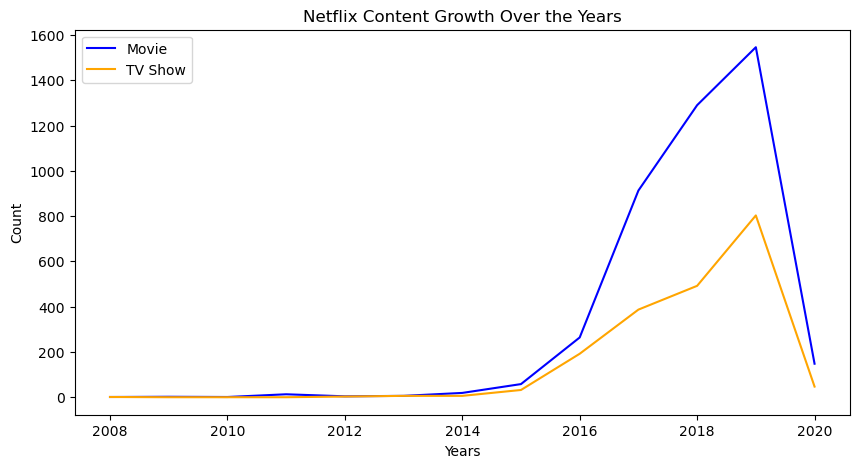

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(type_data['Movie'], color='blue', label='Movie')
ax.plot(type_data['TV Show'], color='orange', label='TV Show')
plt.legend(loc="upper left")
plt.title('Netflix Content Growth Over the Years')
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

In [30]:
netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]

<AxesSubplot:xlabel='year_added', ylabel='count'>

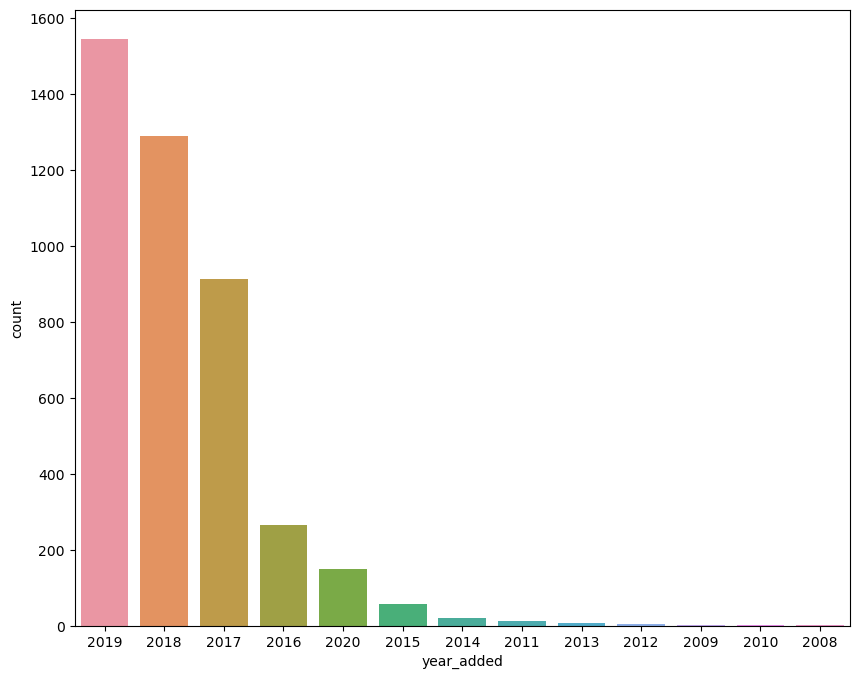

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_movies_only, order = netflix_df_movies_only['year_added'].value_counts().index[0:14])

In [32]:
netflix_df_shows_only = netflix_data_df[netflix_data_df["entertainment type"] == "TV Show"]

<AxesSubplot:xlabel='year_added', ylabel='count'>

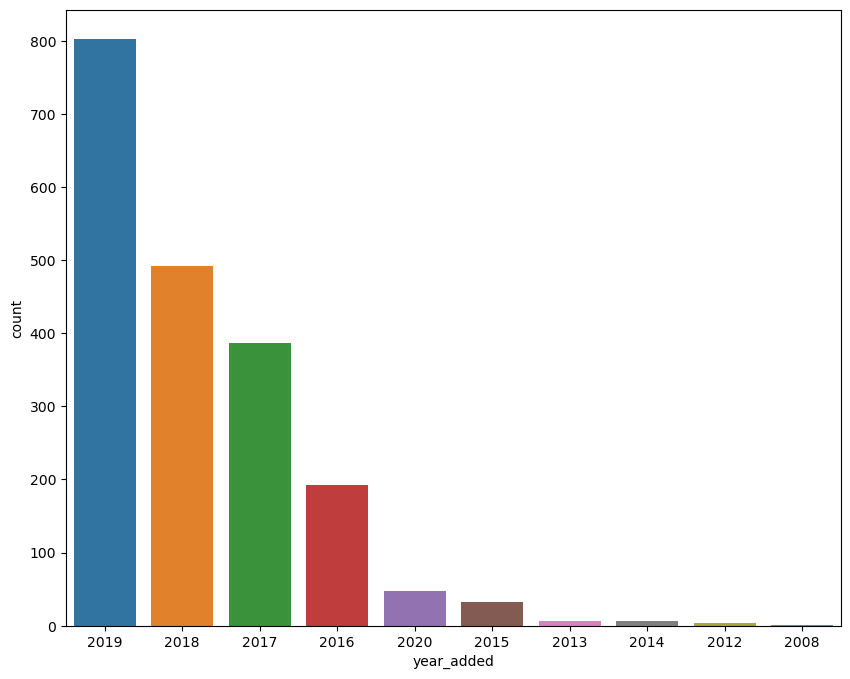

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x="year_added",data=netflix_df_shows_only, order = netflix_df_shows_only['year_added'].value_counts().index[0:14])

In [34]:
# netflix_data_df[netflix_data_df["entertainment type"=="Movie]=["genre"].value_counts()[:10].plot(kind="barh",color="black")
# plt.title("Top 10 Genres of Movies",size=18)


In [35]:
# plt.scatter(netflix_data_df["release_year"], duration_df["duration"])

# # Create a title
# plt.title("Movie Duration by Year of Release")

# # Show the plot
# plt.show()

In [36]:
# netflix_df_movies_only = netflix_data_df[netflix_data_df["entertainment type"] == "Movie"]

# netflix_data_df= netflix_df_movies_only.plot.scatter(x='year_added', y='genre')
# netflix_genre.plot.value_counts().line(x='year_added', y='genre')
# plt.show()





# fig = plt.figure(figsize=(12,9))

# # Create a scatter plot of duration versus year
# plt.(netflix_df_movies_only["duration"], netflix_df_movies_only['release_year'])

# # Create a title
# plt.title("Movie Duration by Year of Release")

# # Show the plot
# plt.show()

#questions: 
# What content is available in different countries?
# Which genre is most watched?
# Highest-rated movie in a particular year?
# How many TV shows and movies are available for kids?


dataFrame.plot.bar(x="type", y="show", rot=70, title="Number of tourist visits - Year 2018");
plot.show(block=True);